In [2]:
#-*- coding: utf-8 -*-
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

borrowname = ['ID', 'BORROW_DATE', 'BORROW_BOOKNAME', 'BORROW_BOOKID']
#borrow_train = pd.read_csv("../data/train/borrow_train.txt", names= borrowname).fillna(-1)
borrow_train = pd.read_csv("../data/train/borrow_traintest.txt", names= borrowname)
#borrow_train.info()
borrow_train.describe()

,ID
count,227328.000000
mean,14763.049211
std,8447.314972
min,11.000000
25%,7724.000000
50%,14537.000000
75%,20544.000000
max,32643.000000


In [3]:
borrow_train.head(5)

,ID,BORROW_DATE,BORROW_BOOKNAME,BORROW_BOOKID
0,9708,2014/2/25,我的英语日记 wo de ying yu ri ji / (韩)南银英著 (韩)卢炫廷插图,H315 502
1,6956,2013/10/27,解读联想思维 jie du lian xiang si wei : 联想教父柳传志,K825.38=76 547
2,23939,2015/3/8,电路分析 dian lu fen xi 刘健主编,TM133-43 56
3,22047,2014/12/29,现代物流学 xian dai wu liu xue = Contemporary logis...,F252 161
4,9076,2014/3/28,"公司法 gong si fa = = Corporation law / 范健, 王建文著 eng",NaN


In [4]:
cardname = ['ID', 'CARD_CAT', 'CARD_LOCID', 'CARD_LOC', 'CARD_TIME', 'CARD_MONEY', 'CARD_SURPLUS']
card_train = pd.read_csv("../data/train/card_train.txt", names= cardname)
#card_train.info()
card_train.describe()

,ID,CARD_MONEY,CARD_SURPLUS
count,1.245556e+07,1.245556e+07,1.245556e+07
mean,1.424276e+04,7.171715e+00,1.176017e+02
std,8.728961e+03,2.710605e+01,1.242041e+02
min,0.000000e+00,-7.000000e+02,0.000000e+00
25%,6.621000e+03,1.000000e+00,4.120000e+01
50%,1.393800e+04,3.000000e+00,8.366000e+01
75%,2.061300e+04,5.300000e+00,1.552600e+02
max,3.267100e+04,4.407000e+03,4.399840e+03


In [5]:
card_train['CARD_LOC'].unique()

array(['淋浴', '开水', '其他', '洗衣房', '文印中心', '教务处', '图书馆', '食堂', '校车', nan,
       '超市', '校医院'], dtype=object)

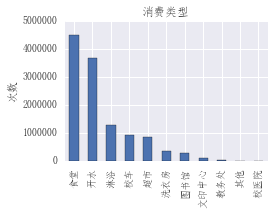

In [6]:

fig = plt.figure()
fig.set(alpha = 0.2)

plt.subplot2grid((2,2),(0,0))
card_train.CARD_LOC.value_counts().plot(kind='bar')# 柱状图 
plt.title(u'消费类型') # 标题
plt.ylabel(u'次数')

plt.show()

In [7]:
score_train = pd.read_table('../data/train/score_train.txt',sep=',',header=-1)
score_train.columns = ['ID','COLLEGE','SCORE']
score_test = pd.read_table('../data/test/score_test.txt',sep=',',header=-1)
score_test.columns = ['ID','COLLEGE','SCORE']
score_train_test = pd.concat([score_train,score_test])


In [10]:
college = pd.DataFrame(score_train_test.groupby(['COLLEGE'])['SCORE'].max())

In [46]:
a = score_train_test.groupby(['COLLEGE'])['SCORE'].max()

In [47]:
a

COLLEGE
1      370
2      398
3     2304
4     2416
5     2775
6     1570
7      963
8     2830
9     2933
10     747
11     613
12     513
13    2714
14     582
15     631
16     406
17    2051
18     193
19    2305
Name: SCORE, dtype: int64

In [50]:
b = score_train_test.groupby(['COLLEGE'])['SCORE'].value_counts()

In [51]:
b

COLLEGE  SCORE
1        1        1
         2        1
         3        1
         4        1
         7        1
         8        1
         11       1
         12       1
         13       1
         14       1
         15       1
         16       1
         19       1
         20       1
         21       1
         22       1
         23       1
         24       1
         25       1
         26       1
         27       1
         28       1
         29       1
         30       1
         31       1
         32       1
         33       1
         34       1
         35       1
         36       1
                 ..
19       2267     1
         2268     1
         2270     1
         2271     1
         2272     1
         2273     1
         2274     1
         2275     1
         2276     1
         2277     1
         2278     1
         2279     1
         2282     1
         2283     1
         2284     1
         2285     1
         2288     1
         2289     1
     

In [52]:
college

,SCORE
COLLEGE,
1,370
2,398
3,2304
4,2416
5,2775
6,1570
7,963
8,2830
9,2933


In [62]:
score_train_test[score_train_test['COLLEGE'] == 1].sort_index(by=['SCORE'])

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


,ID,COLLEGE,SCORE
3307,10034,1,1
3308,10035,1,2
3277,10038,1,3
3278,10039,1,4
3279,10042,1,7
3280,10043,1,8
3309,10046,1,11
3310,10047,1,12
3281,10048,1,13
3282,10049,1,14
